            timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season        date weekday  
0         0.0         1.0     3.0  2015-01-04  Sunday  
1         0.0         1.0     3.0  2015-01-04  Sunday  
2         0.0         1.0     3.0  2015-01-04  Sunday  
3         0.0         1.0     3.0  2015-01-04  Sunday  
4         0.0         1.0     3.0  2015-01-04  Sunday  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp  

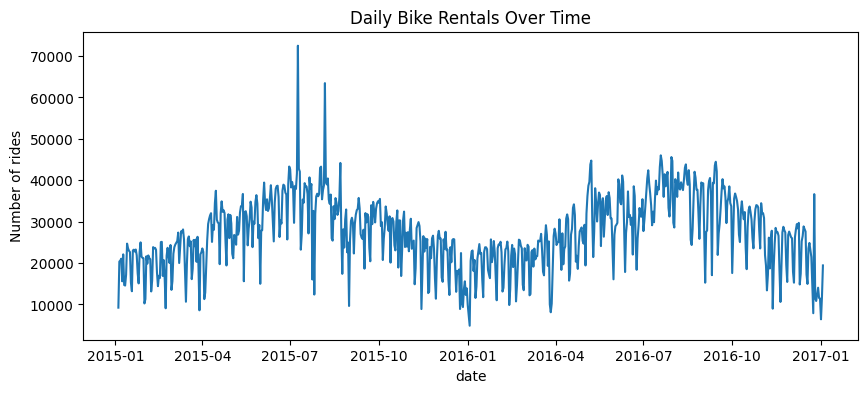

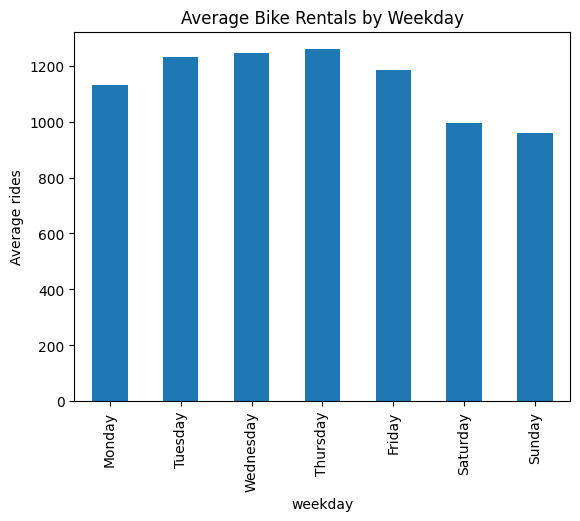

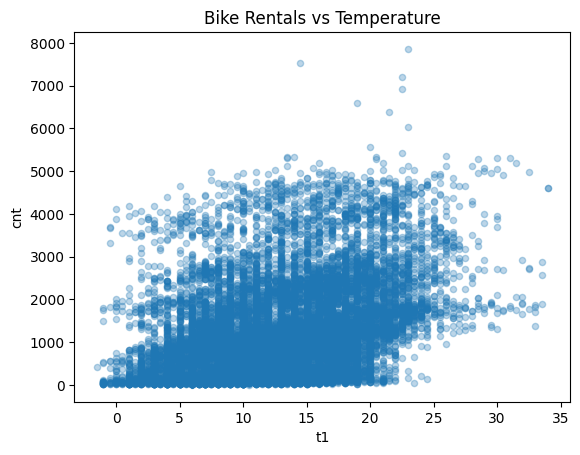

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("london_merged.csv")

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.day_name()

print(df.head())
print(df.info())

# --- KPI: Total rides ---
total_rides = df['cnt'].sum()
print("Total rides:", total_rides)

# --- Trend over time ---
daily_rides = df.groupby('date')['cnt'].sum()
daily_rides.plot(kind='line', figsize=(10,4), title="Daily Bike Rentals Over Time")
plt.ylabel("Number of rides")
plt.show()

# --- Bar chart: usage by weekday ---
weekday_rides = df.groupby('weekday')['cnt'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
weekday_rides.plot(kind='bar', title="Average Bike Rentals by Weekday")
plt.ylabel("Average rides")
plt.show()

# --- Optional: correlation with temperature ---
df.plot.scatter(x='t1', y='cnt', alpha=0.3, title="Bike Rentals vs Temperature")
plt.show()
